In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


Matplotlib is building the font cache; this may take a moment.


In [10]:
DATA = Path("../Data") / "SuperMarket Analysis.csv"
df = pd.read_csv(DATA)
df.columns = [c.strip().replace("\ufeff", "") for c in df.columns]
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

In [11]:

df["jour_de_semaine"] = df["Date"].dt.dayofweek
df["mois"] = df["Date"].dt.month
df["surplus"] = df["cogs"] - df["Quantity"]
df["surplus"] = df["surplus"].clip(lower=0)


In [12]:
print("📊 Aperçu du dataset :")
display(df.head())

print("📋 Statistiques descriptives :")
display(df.describe(include="all"))

print("📁 Colonnes disponibles :")
print(df.columns.tolist())



📊 Aperçu du dataset :


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,jour_de_semaine,mois,surplus
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,5,1,515.83
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,4,3,71.40
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,6,3,317.31
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,6,1,457.76
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,4,2,597.17


📋 Statistiques descriptives :


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,jour_de_semaine,mois,surplus
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,NaN,506,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,750-67-8428,Alex,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,NaN,7:48:00 PM,Ewallet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,340,340,565,571,178,NaN,NaN,NaN,NaN,NaN,7,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,NaN,NaN,307.58738,4.761905,15.379369,6.97270,3.032000,1.993000,302.077380
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,NaN,NaN,10.17000,4.761905,0.508500,4.00000,0.000000,1.000000,9.170000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,NaN,NaN,118.49750,4.761905,5.924875,5.50000,1.000000,1.000000,113.227500
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,NaN,NaN,241.76000,4.761905,12.088000,7.00000,3.000000,2.000000,236.965000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,NaN,NaN,448.90500,4.761905,22.445250,8.50000,5.000000,3.000000,442.505000
max,NaN,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,NaN,NaN,993.00000,4.761905,49.650000,10.00000,6.000000,3.000000,983.000000


📁 Colonnes disponibles :
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'jour_de_semaine', 'mois', 'surplus']


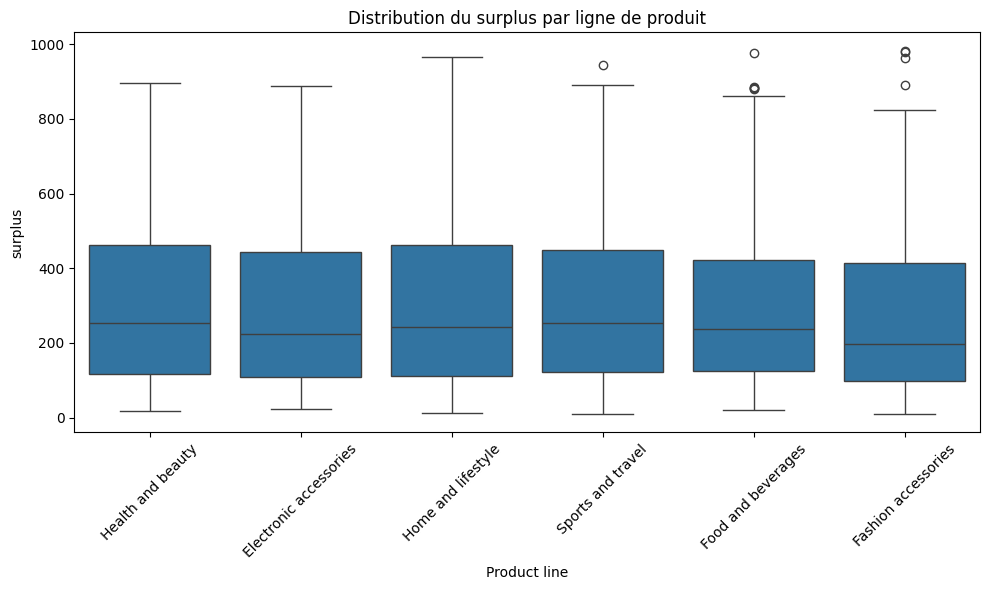

In [13]:

# Surplus par ligne de produit
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Product line", y="surplus")
plt.xticks(rotation=45)
plt.title("Distribution du surplus par ligne de produit")
plt.tight_layout()
plt.show()


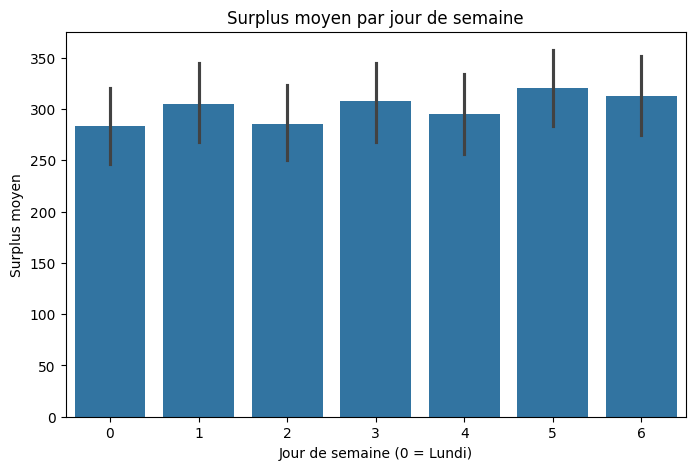

In [14]:
# Surplus par jour de semaine
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="jour_de_semaine", y="surplus", estimator=np.mean)
plt.title("Surplus moyen par jour de semaine")
plt.xlabel("Jour de semaine (0 = Lundi)")
plt.ylabel("Surplus moyen")
plt.show()



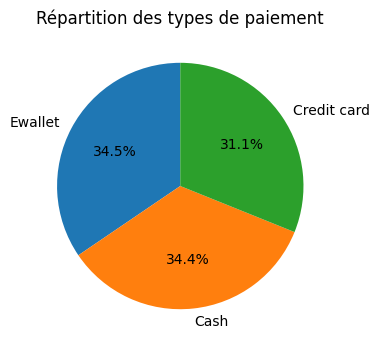

In [15]:
plt.figure(figsize=(6,4))
df["Payment"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Répartition des types de paiement")
plt.ylabel("")
plt.show()
